In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
from mpl_toolkits.basemap import Basemap
from slugify import slugify

In [2]:
# set 'paper' seaborn style
sns.set('paper')

# get default plot dimensions to be used below
figwidth, figheight = plt.rcParams['figure.figsize']

# keyword arguments to be passed to `savefig`
savefig_kws = {
    'dpi': 300,
    'bbox_inches': 'tight',
    'pad_inches': 0
}

In [3]:
# for Basemap
epsg = 4326
plot_crs = {'init': f'epsg:{epsg}'}

In [4]:
agglomeration_slug = 'bern'

gdf = gpd.read_file('../data/raw/gmb/g1a18.shp')
west, south, east, north = gdf[gdf['ANAME'].apply(slugify).str.contains(agglomeration_slug)].to_crs(plot_crs).total_bounds

/home/martibosch/anaconda3/envs/swiss-urbanization/lib/python3.6/site-packages/owslib/map/wms111.py:128: UserWarning: Content metadata for layer "ch.bakom.notruf-118_mobilnetz" already exists. Using child layer
  warnings.warn('Content metadata for layer "%s" already exists. Using child layer' % cm.id)


/home/martibosch/anaconda3/envs/swiss-urbanization/lib/python3.6/site-packages/owslib/map/wms111.py:128: UserWarning: Content metadata for layer "ch.bakom.notruf-118_mobilnetz" already exists. Using child layer
  warnings.warn('Content metadata for layer "%s" already exists. Using child layer' % cm.id)


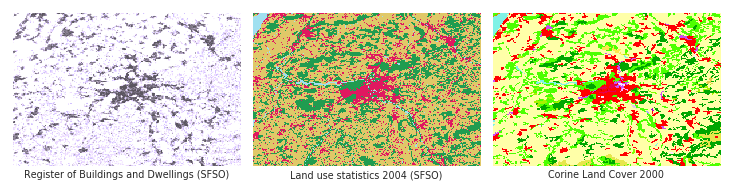

In [13]:
fig = plt.figure(figsize=(5*2.54, 3 * figheight*2.54))
fig.subplots_adjust(hspace=0.1, wspace=0.05)

m = Basemap(
    epsg=epsg,
    llcrnrlon=west,
    llcrnrlat=south,
    urcrnrlon=east,
    urcrnrlat=north,
)
ax = fig.add_subplot(131)
m.wmsimage(
    'https://wms.geo.admin.ch/?',
    layers=['ch.bfs.volkszaehlung-gebaeudestatistik_gebaeude'], ax=ax)
ax.set_xlabel('Register of Buildings and Dwellings (SFSO)')

ax = fig.add_subplot(132)
m.wmsimage(
    'https://wms.geo.admin.ch/?',
    layers=['ch.bfs.arealstatistik-04'], ax=ax)
ax.set_xlabel('Land use statistics 2004 (SFSO)')

ax = fig.add_subplot(133)
m.arcgisimage(
    server='https://image.discomap.eea.europa.eu/arcgis', service='Corine/CLC2000_WM', ax=ax)
ax.set_xlabel('Corine Land Cover 2000')


fig.savefig('../reports/figures/sls_clc_comparison.pdf', **savefig_kws)